In [42]:
import xml.etree.ElementTree as ET
tree = ET.parse(path)
root = tree.getroot()


In [175]:
for c in root.findall('object'):
    xmin=int(c.find('bndbox/xmin').text)
    print(xmin)

    

266
638


# cleaning train-data

In [195]:
import os
from PIL import Image
import xml.etree.ElementTree as ET
xml_path=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/annotations/'
imgs_path=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/images/'
crop_imgs_path_with_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/with_mask/'
crop_imgs_path_without_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/'

In [196]:
i=1
j=1
for file in os.listdir(xml_path):
    tree = ET.parse(xml_path+file)
    root = tree.getroot()
    try:
        img_name=str(root.find('filename').text)
        img=Image.open(imgs_path+img_name)
        for c in root.findall('object'):
            name=str(c.find('name').text)    #face or face_mask
            xmin=int(c.find('bndbox/xmin').text)
            ymin=int(c.find('bndbox/ymin').text)
            xmax=int(c.find('bndbox/xmax').text)
            ymax=int(c.find('bndbox/ymax').text)
            crop_img=img.crop((xmin,ymin,xmax,ymax))
            new_img=crop_img.resize((224,224))
            if name=='face':
                new_img.save(crop_imgs_path_without_mask+str(i)+'.jpg')
                i+=1
            elif name=='face_mask':
                new_img.save(crop_imgs_path_with_mask+str(j)+'.jpg')
                j+=1
    except:
        pass
    

# train-  face_mask croped images
<img src="https://github.com/sumanth13131/Dockship/blob/master/1.jpg?raw=true">

# train - face croped images
<img src='https://github.com/sumanth13131/Dockship/blob/master/2.jpg?raw=true'>

# cleaning validation-data

In [197]:
import os
from PIL import Image
import xml.etree.ElementTree as ET
xml_path=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/annotations/'
imgs_path=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/images/'
crop_imgs_path_with_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/with_mask/'
crop_imgs_path_without_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/'

In [198]:
i=1
j=1
for file in os.listdir(xml_path):
    tree = ET.parse(xml_path+file)
    root = tree.getroot()
    try:
        img_name=str(root.find('filename').text)
        img=Image.open(imgs_path+img_name)
        for c in root.findall('object'):
            name=str(c.find('name').text)    #face or face_mask
            xmin=int(c.find('bndbox/xmin').text)
            ymin=int(c.find('bndbox/ymin').text)
            xmax=int(c.find('bndbox/xmax').text)
            ymax=int(c.find('bndbox/ymax').text)
            crop_img=img.crop((xmin,ymin,xmax,ymax))
            new_img=crop_img.resize((224,224))
            if name=='face':
                new_img.save(crop_imgs_path_without_mask+str(i)+'.jpg')
                i+=1
            elif name=='face_mask':
                new_img.save(crop_imgs_path_with_mask+str(j)+'.jpg')
                j+=1
    except:
        pass
    

# validation - face_mask images
<img src='https://github.com/sumanth13131/Dockship/blob/master/3.jpg?raw=true'>

# validation -face images
<img src='https://github.com/sumanth13131/Dockship/blob/master/4.jpg?raw=true'>

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [5]:
def paths(dirctory1,dirctory2):
    path=[]
    for file in os.listdir(dirctory1):
        path.append(dirctory1+file)
    for file in os.listdir(dirctory2):
        path.append(dirctory2+file)
    return path

In [6]:
train_crop_imgs_path_with_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/with_mask/'
train_crop_imgs_path_without_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/'
train_path=paths(train_crop_imgs_path_with_mask,train_crop_imgs_path_without_mask)

In [7]:
import random
random.shuffle(train_path)

In [8]:
train_path[:10]

['E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/with_mask/1203.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/2917.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/6759.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/5140.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/with_mask/563.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/3145.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/1415.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/265.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/4389.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/training/crop images/without_mask/5711.jpg']

In [9]:
val_crop_imgs_path_with_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/with_mask/'
val_crop_imgs_path_without_mask=r'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/'
validation_path=paths(val_crop_imgs_path_with_mask,val_crop_imgs_path_without_mask)

In [10]:
len(validation_path)

2861

In [11]:
import random
random.shuffle(validation_path)

In [12]:
validation_path[:10]

['E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/362.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/1830.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/1490.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/840.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/1657.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/with_mask/115.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/1376.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/without_mask/851.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/with_mask/480.jpg',
 'E:/Desktop Files/Dockship/dataset/COVID-19/validation/crop images/with_mask/438.jpg']

# 1 -> without_mask
# 0 -> with_mask

In [13]:
def labs(paths):
    labels=[]
    for path in paths:
        label=path.split('/')[-2]
        if label == 'without_mask':
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [14]:
train_labels=labs(train_path)
val_labels=labs(validation_path)

In [15]:
train_labels[:10]

[0, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [16]:
val_labels[:10]

[1, 1, 1, 1, 1, 0, 1, 1, 0, 0]

In [17]:
len(train_labels)

7914

In [18]:
len(val_labels)

2861

In [19]:
train_data=[]
for img in train_path:
    image = load_img(img, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    train_data.append(image)

In [20]:
len(train_data)

7914

In [21]:
val_data=[]
for img in validation_path:
    image = load_img(img, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    val_data.append(image)

In [22]:
len(val_data)

2861

In [23]:
train_data = np.array(train_data, dtype="float32")
train_labels = np.array(train_labels)
val_data = np.array(val_data, dtype="float32")
val_labels = np.array(val_labels)

In [24]:
aug = ImageDataGenerator(rotation_range=20,
                         zoom_range=0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [25]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process

C:\Users\suman\Desktop\AACONDA\envs\dockship\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [26]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [27]:
H = model.fit(aug.flow(train_data, train_labels, batch_size=BS),
              steps_per_epoch=len(train_data) //(6* BS),
              validation_data=(val_data, val_labels),
              validation_steps=len(val_data) // (6*BS),
              epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 41 steps, validate on 2861 samples
Epoch 1/20
41/41 [==============================] - 290s 7s/step - loss: 0.4083 - accuracy: 0.8186 - val_loss: 0.0369 - val_accuracy: 0.9308
Epoch 2/20
41/41 [==============================] - 269s 7s/step - loss: 0.1706 - accuracy: 0.9426 - val_loss: 0.0249 - val_accuracy: 0.9554
Epoch 3/20
41/41 [==============================] - 275s 7s/step - loss: 0.1727 - accuracy: 0.9436 - val_loss: 0.0248 - val_accuracy: 0.9598
Epoch 4/20
41/41 [==============================] - 264s 6s/step - loss: 0.1273 - accuracy: 0.9543 - val_loss: 0.0307 - val_accuracy: 0.9621
Epoch 5/20
41/41 [==============================] - 264s 6s/step - loss: 0.1403 - accuracy: 0.9573 - val_loss: 0.0385 - val_accuracy: 0.9375
Epoch 6/20
41/41 [==============================] - 278s 7s/step - loss: 0.1049 - accuracy: 0.9672 - val_loss: 0.0344 - val_accuracy: 0.9420
Epoch 7/20
41/41 [==============================] - 263s 6s/step - loss: 0.1113 - ac

In [28]:
model.evaluate(val_data,val_labels)

2861/2861 [==============================] - 108s 38ms/sample - loss: 0.1338 - accuracy: 0.9643


[0.13377951368675214, 0.96434814]

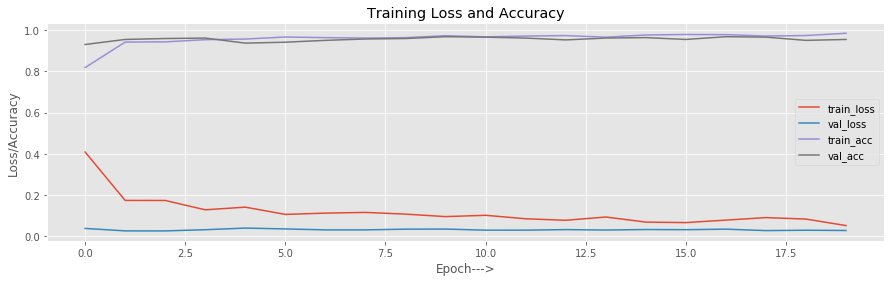

In [33]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(15,4))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch--->")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

In [46]:

model.save('E:\Desktop Files\Dockship\dataset\COVID-19\models\cnn_model')

INFO:tensorflow:Assets written to: E:\Desktop Files\Dockship\dataset\COVID-19\models\cnn_model\assets


In [42]:
model.save('E:/Desktop Files/Dockship/dataset/COVID-19/models/my_model.h5') 